In [ ]:
# !pip install tensorflow
# !pip install numpy

## Import Required Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg19

## Downloading Base and Style images

4739/4739 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
31944/31944 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

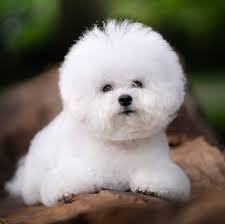

In [2]:
base_image_path = keras.utils.get_file("dog.jpg", "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSEhIVFRAVFRAQFRAVEBUVFRAVFRUWFhUVFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGBAQFysdHR0tLS0tLS0tLS0tLS0tLS0tLSstLS0tLSstLS0tLS0tLS0tLS0tLS0tKy0tLS0rLS0tLf/AABEIAOAA4QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAIFAAEGBwj/xAA1EAABBAAEBAQEBQQDAQAAAAABAAIDEQQFEiEGMUFREyJhcRSBkaEHMrHB8BUjQtGC4fFS/8QAGAEAAwEBAAAAAAAAAAAAAAAAAAECAwT/xAAfEQEBAQEAAwADAQEAAAAAAAAAARECAxIhEzFRYQT/2gAMAwEAAhEDEQA/AOIYUUPSMb0UPC4OeKwkNNcihyRM9LGS2VV8YxeQSojnqugkRy9Z3mQ8kblcuezNyt8RMqHHPtX4/wBr5IEqIK0SoWurGg4cmI3pNrkVjksCzgerLDqmgcrfBG/0WXcFWkDE7HElYHgJtmIC5OoipGEJWaNN+IChPRLgwhJGlngJ2cqvmcpv1NjNag+RDMoQ3SLP02pxkhQHBHYVIgLbnnDIujQyxPOCBIFQKkLWpTe5LyOV8zQJqWJbxFiv1prKA37JtoCQgcnI910SYGpY1uNqO4bIbmrHyd4m0xDIiPmSgNIcsq590mYmZVOIejzTJGV66fHy15DcVElaJWiVupMFGjBPLdGynAOmeGBpN35gaqh67H26r0DgPgmV0wMjXta0+bkNe5adiDtRvp+6eaHFYPD6pGxte2yQA42Gm+23L12tdvwvwy6cEU4ODgxwIot2Jsjtt0Pbl1Z4k4GfBiRI1rntMpeKOzPNbW1zragL2+y9L4Xw7WsLgKMn911ijb9vsBSPTb9DzbOuG3RaGsJJdpceVgG9gOvIAd7W8q4Ykk1Od5WAHSBZJqi4+rQOt7mh1XqWNy9sj3EtF6KBrkQCVAYENYGgbENaTdEtbvV+pP3S/DzpY8mkyuUbRte91jYNs7gbGuRCFjMDPF+eJ4A21Fp0/XkvaMNgmgXQFcu6UzTL/FaWAaQdrHX09Qs+v+XmjHhc+JSM0y9SzjgOHSTqcH0dIaBz6X/rYLynNcvlhcQ9jhXUtIHosb4Lz+ywtJMoCZJveo+Iq/GMWTZUVsqqxOjRzKbxicPGRCe9C8RCfIo9QyRyWkcskkQHOWvHIbtYh2sWyljA9WMLlT4eRPtl2S7TYcdMtOlSDpqQpcSubri9Jw6/EJSadKumQXyrTjxYqQV8iC5yGXrVrokXE7RsHh/Ee1lhuohuo8m3+vsh4aB0jg1oJJIGwJ/Re5/hvwE+FokneH2GkRFteGQT13vp2VSabXAPBWgXK0GjbJQCLH/yWkmjtf8AyK9LZg9IAGxHLak1Bhmt5NAPM0ilWZV7NQ8ws9UrhsPoNA+TlXUb3+6sXBCczmmTQaomIE2enJFbyWgUBvSFEtWiVrWmGm4cXZ591V57ksM7C2RjXDerA29b6FWZehucgPmvjjh04OctaCYiNTXUaHcX7rl3OX1BxLljMRE+OQeVwI5Db1APUL554pyB+Gmc3SfDFaTtekAAXXXZZdc4MUYcjRyJZTa5RYk14qiXoOpZqUeoxJzkMlRcVG1cgStYorEzHjfSM2ZKAqQKLALLKgukUXlDROSxMvUNS0tgKjbBWwsDCrDKsnlneGsHMgfwdUHj0L8HeFnyv+IeC2PkLb+ej0JHKwbpe/YeINHRU/DGDdFCxriCQ1reVch26eyuVchpkqBK0VBMmytFaLlAvQE1C1HWolyAk8qBcouehkoCTnIbnqLigPJTCUjrXJcXcMNxLD5iHCyOS6QvUJ3bIs0PmnN8tdC8tI3H3VcvRvxEwv8AevTVhedytolY/wCCo2s1LSxBNErVrCtIDdrFpYgJgrdqIW0BorKUg1EZA49EACkxh4L6J/CZSTzV7hMvDeinrtpzxqtwWVF25C9R/DfhlrT4pPmutNfoVzmDhHZej8AxCj7/AEU+O70175zl20DNIpSJWwhuK6XOnag8rRegvekbb3oDpkKeXZLCX5+qDw74ii6ZLB6i1/dGjB3SKDpUGWdrRuR9Uicwb0PojSxZeMhvcl2usX3U3NTlAb3LWpalUWphyvHeA8SBxA8w3uhfsvEsSzzFfQmeBpYQ7kRS8YzzL9ErhVe3L0IWffz6V/TnNKzQrL4ZZ8MsvZOqzw1vwlZfDLPh0ew1W+EsVl8OsT9grmxFNQ4IlWGHwqtcNhgl7NOedVmGyq+itMPlYHRWOHhCcDFNracwhFhqTccKnSNE1Jc+CQMXo/AteHsPNZv0XARtXa8ATU5zSeY2Cvx/KnyfY7YoJR3oTwt3OC5yWxRRpEGUWD7JGo84zJsbbJFb9VwzOPWufTGPMWrR4wFMv3XVcRcPuxMbm2W6g5tjsRVqt4e/DER0+R7nEaRTdLQdO++3fp91P7V+l/lWLc5u/vunrJ6e6by7BRxNAA5Da+gCr8ZxFhWktdI0HruFUhVy3Fg10wCQA7eLG7zRno6iKd7bLjcmOKw+IbG5z3wkubqcNiRyLTW3svYYMbHILjLS0/5CiEx8KxwsgWDzoIsGqzLdwCeyffHR9E07CgdK9kKSx7I1JZ8YQH0OSZO6XmZX+1UoVOZOBaQdxR29l5Nn0mqQmq6AXdL1PF76hdbc+y8uzjD0876gHHfuo8n6PCkeGsKXwiawZTZYubGeRU/CLXwqtSxDLEDFd8KsVhpWIwZCEQTsTqVc1yM160x0crSKZNCRVkCdYFNaQcOTMDgkHvpDZid1MUvmvCueGcUWTNrrsuZw8lq7yZhMrA0XuCVXN+pv6erxS6qWTg9ELCbJh7guhzl9FKOi/ZSeVjCgMEIu/wCBSkoNUr6oeIkACkOa4tfKMJKYfz6SR01dx9LXztjMzxIJD3iyTVaTQ+S+lc2xTQ039PReJcXZXhmvD6a0nzHzVe10R9PqnosXX4PGXTJqkuM6aAJ2dvf2peu5e6hR/wDV5JwtnmGYzTG5jao6QK5n9dwu8wWbgi6pLqw5PjsJXBVs8m/yQvHJALTYS75CTaNGCudsUriZALQMTiiD6VuqrG4u+tDuqlLAs1xAYHOJ2o/ouBm3RuKs81kMYfKOZ7lVWHxNt3UddbVyfEg6inI5VTY2WkTC4pZ9Rn1FsXoTnpczIbpllrM1rWJPxViejQGhMxMQWBNxrW11SGYW0mQUk2ZEEyzrSN4gpeHmpSPtPZPlkkzgGNvuegTkFqwyjCOkcGtFk/ZeqcO5G2Bt83HmUDhjh5sDRtb+rl01dF0c8Yw7734GG7IUkn1TD0nOnUwvNidwL7I8UvZImGjYTERrZSdOeKNJB72q3M8SBv03KKZN6Vbi/M0+iVEc9mDnS6gSQDtYK53G8KRSuo8z/l1+vPt9F0lbmu5WRxm7r6qZV2KrD8ORsbp0tsbag0C/cJ/A4avL06fLorB8oI5V0Sb+ex3RaJFgybS2wTyRYsX1VcXE1fzUZ8SBsEQsNYyQVZXHZ3jC1p8RwazcbdfdWuY5i1jSbut6XmedZk+Z296Adm/7V0oBicQHOJA2JRMNLSRapqVGsVulY3FpRmOtRlYlZqepqfxCgcQlnmkEyLnvF1h6nfHW0h4qxHpRi68Wlv4pVk8ygyRb46tWRnR2TFV8ZVlleG8WRsYNajVpYrV9wvkL8U/tGObl67w/kUeHYGtHuepSvC2TtgiawfM9yumjaujnmcxh11osTaWyVoLSEtSOSrwmXhCLUKhRwQXOKdLUtPEoplJnEe/dISOoJydp+irZ8SR0sKaqRGPD2bPupvFc+QQBmbejT9UrLmoJoD7pfDymcQ88g0fMpJ5d1q/RAxGZP2oD1QRO89fskZtzyBuUlNMOnND8xO5JRREnCtc3xLE8xkj5rjRE7+BenYqG2kELip8THqIFbbKe/ivH9UzICskjI2KsIpGl+26fOVF+9KfyL/G59thMNHcLpsFkjW7u3KhnWVGtTBsOif5JpfjuOTxcSq5HUr2dnQ81TYxlGlp+2HXJfWsUNKxGIw/KoRlSeLUGt3Q0OxFdl+HOX+LibcLDBfz6Ln8kyl0pocu69k4H4fbAy/8AI8ynzz907fjq8LHQTzAlotkw1y1rIUrTFFzlONI2OCC5MEILmFARDUCVqYIQnlKhX4hqrZ8OPf0Vu8JSZijFyqPF4EdAq2fAHmAumMdoL4AUsV7Oa+FPZGZg6Cujhws+GASwr0qhhls4ZWnhhDfGrkTap5YFwGP4VuVzm2AXE8/VeoyQqmng3IU+X5NV4vtxy2X8PtZ7q2bGG7BMyRAdVuNgG65ddeYHGxGLBVHkpc1LDtuwUYFHjMjhkN8iuRzjKzE6qsHkV6NicOBuFW43CCQb9N1fPViOuJXnn9MPZYum8ELFp7svxuOaVOJlkKGlPZVhtcjW+oWjN6Lwbgz4Y0j5r1LLWUwey5vh3BiONrQOgXVQclpECNKlqUXFRcLQDIdsmIxsgQABEc/6IIQuWWhalmpBskQJCiPkSuIf1J+QSAcpSkh3R5Tsk3EpGxz+iG4oOs7/AFUif2SNIBaIRgzVVck0zD7ICt0LGsT8kSg6BVEkJAkcdgg8bGj3VvIxIysTzRuOLxbHxup/yPQrTMWaoroMxwweCD8lzczgw6Dsf1XP348/To48u/sX43pyTLZTsfqqyZzSPVAwuNI2dyWeNPZbzTbbKrfiyDRRvih0VXmZcfMESC05caxUninusTwtc9hMO6Q6W813PCnD5a4Fw3XLcMShj7d8l6tlGNa4A7Lp5jlro8DHpaAreN2yo8NiQSBasnT7KqRoyKcbuqqDid1ZMdsEjw61yldoAegy4mtkWlIZL1B8yWkn9flaRnxo39PklqsWLsUOqXmxI6qknzJvcX77hUmaZw3Q7zbiutUQe6Xsfq62fEAgn0VdJjx3+648Z9LIz+y3xCPzNBG/pZ2HuhHNH2DJC9oPS2uPyo0j2g9a6+XFAC7Fcyof1JtXfl2NUuTGaggA2B2LTt7nqkcbnbWbud5e3dMnqWVzhwG+x3B7q0Eq874U4lZLFZIboJBvmGgXq9q/RW2XcWwyOI8Rt6tDYzs800OJDT035paeOoklCg+QUqLB8QRyvNObQOijzLhvQ/nRHmxw7j69k5SsPukCTxBS0+MI6etdUlJmYP8A6qS1iXrmuIo/LrH5h+it5cUN1T5zP/bcp6+ynz8qlixDq5KTW7bn5KvbiCFOLEG1zOkYylpI6I7JxW6VL7UwBW30SlNvS1Yo6nLE9LHL4dhtdVlmZlgAvkqKMAI7XrbWOO1y3PTrbfJdmzF6hzXjseKI5c10mA4iOmiDYVe39Hr/AB28045K9ws9sBXkmNzmZ/5WkVyXQcOcSPDdEwo9HDkfdTO5p3ivQJMWGi1zed8SNja8AgvFV1r37BJ4rNgQQ02D6rmMVhtTy4Dzna+tKe/JJ8Vx47fq0xPF4e0Fo8Py1qu9RPQHl9VXwZriHNDZJPlzcRfcbcvdVbOHhdmV3OwABQ5bfZXWEwzGCmtA633Kyvk/lbc+P+xqtR5/Un/pQdlkJ/M3V1I1uo+4vdTkgN/v2S0mJ0mlHtV+sOYGNkApjA0Heh/2junBFEbKlkx4SsuO9UZS2RaYhkYDjzPQXz9Ehoa5tnY9udKvkx47oYxw/hVzUXD7oQBqDq69lXuhjokjmK1Dyn6hbfjdQralL44adOltJy1NnILcF5ajmI7FwBI+Yo/umculngrcPaNRsPN2epB/RVxcGk6evqpMnPf7q5UXmLw8SONaiQaI9SFuPNhXP23VBPIDz3SbpK5KvZN5dV/Ub2tBx+M1Npc3DiD3TLA53NF6E5GLh03RogpQ4dMxsCxtbSNMaiELHOAUTMElJavRYh+MFiCU1hGjjvotxxsN006xzb0+RTkQH8Ku9/xE5QiiP8CbiFKHxAHX6f7R2yB3VTb/AFcn8HgBPp6phldTfugRNHU2oyzAc1FuqmRYxzC9uX85JsTD2XNOzVrOoQX8Sgch80fjtH5JHQzzC+wSOIzcR2SfuuYx+evdyVJPjHO5m1c8aOvK66TicnYEoX9SJXKQz0rGLEEqrxhTvVmZiUtPOo+JshOUmFrJKK1RCi5ypIhcol6FqWlWJ1MvKnG4odIsQTIS0KRqYDVtkSRoYWFWuHjpLwtTWsBTTg7npaSakCbEpKTEInJ2nX4hAdMlDKs1p4WmPFK2lfEWIwa//9k=")
style_reference_image_path = keras.utils.get_file(
    "pattern.jpg", "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIN3R2WX9fsLj2i_Cq-ihfcCux3nJvAkcnhw&s"
)
result_prefix = "dog_in_pattern"

## Displaying Base and Style images

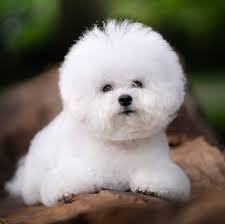

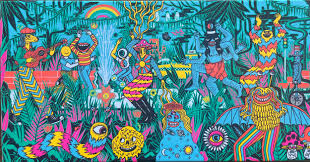

In [3]:
from IPython.display import Image, display

display(Image(base_image_path))
display(Image(style_reference_image_path))

## Weights for different loss componenets

In [4]:
# Weights of the different loss components
total_variation_weight = 1e-6
style_weight = 1e-6
content_weight = 2.5e-8

# Dimensions of the generated picture.
width, height = keras.utils.load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

## Preprocessing Function

In [5]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures into appropriate tensors
    img = tf.keras.utils.load_img(image_path, target_size=(img_nrows, img_ncols))
    img = tf.keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return tf.convert_to_tensor(img)


def deprocess_image(x):
    # Util function to convert a tensor into a valid image
    x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

## Loss Components and Combined Loss function

In [6]:
# The gram matrix of an image tensor (feature-wise outer product)


def gram_matrix(x):
    x = tf.transpose(x, (2, 0, 1))
    features = tf.reshape(x, (tf.shape(x)[0], -1))
    gram = tf.matmul(features, tf.transpose(features))
    return gram


# The "style loss" is designed to maintain the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of feature maps from the style reference image
# and from the generated image


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels**2) * (size**2))


# An auxiliary loss function designed to maintain the "content" of the
# base image in the generated image


def content_loss(base, combination):
    return tf.reduce_sum(tf.square(combination - base))


# The 3rd loss function, total variation loss, designed to keep the generated image locally coherent


def total_variation_loss(x):
    a = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, 1:, : img_ncols - 1, :]
    )
    b = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, : img_nrows - 1, 1:, :]
    )
    return tf.reduce_sum(tf.pow(a + b, 1.25))

## Model

In [7]:
# Build a VGG19 model loaded with pre-trained ImageNet weights
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# List of layers to use for the style loss.
style_layer_names = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]
# The layer to use for the content loss.
content_layer_name = "block5_conv2"


def compute_loss(combination_image, base_image, style_reference_image):
    input_tensor = tf.concat(
        [base_image, style_reference_image, combination_image], axis=0
    )
    features = feature_extractor(input_tensor)

    # Initialize the loss
    loss = tf.zeros(shape=())

    # Add content loss
    layer_features = features[content_layer_name]
    base_image_features = layer_features[0, :, :, :]
    combination_features = layer_features[2, :, :, :]
    loss = loss + content_weight * content_loss(
        base_image_features, combination_features
    )
    # Add style loss
    for layer_name in style_layer_names:
        layer_features = features[layer_name]
        style_reference_features = layer_features[1, :, :, :]
        combination_features = layer_features[2, :, :, :]
        sl = style_loss(style_reference_features, combination_features)
        loss += (style_weight / len(style_layer_names)) * sl

    # Add total variation loss
    loss += total_variation_weight * total_variation_loss(combination_image)
    return loss

In [9]:
@tf.function
def compute_loss_and_grads(combination_image, base_image, style_reference_image):
    with tf.GradientTape() as tape:
        loss = compute_loss(combination_image, base_image, style_reference_image)
    grads = tape.gradient(loss, combination_image)
    return loss, grads

## Training

In [10]:
optimizer = keras.optimizers.SGD(
    keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=100.0, decay_steps=100, decay_rate=0.96
    )
)

base_image = preprocess_image(base_image_path)
style_reference_image = preprocess_image(style_reference_image_path)
combination_image = tf.Variable(preprocess_image(base_image_path))

iterations = 4000
for i in range(1, iterations + 1):
    loss, grads = compute_loss_and_grads(
        combination_image, base_image, style_reference_image
    )
    optimizer.apply_gradients([(grads, combination_image)])
    if i % 100 == 0:
        print("Iteration %d: loss=%.2f" % (i, loss))
        img = deprocess_image(combination_image.numpy())
        fname = result_prefix + "_at_iteration_%d.png" % i
        keras.utils.save_img(fname, img)

Iteration 100: loss=8534.23
Iteration 200: loss=6950.68
Iteration 300: loss=5491.96
Iteration 400: loss=5057.85
Iteration 500: loss=4694.78
Iteration 600: loss=4466.04
Iteration 700: loss=4341.09
Iteration 800: loss=4196.29
Iteration 900: loss=4052.28
Iteration 1000: loss=3977.52
Iteration 1100: loss=3870.28
Iteration 1200: loss=3791.97
Iteration 1300: loss=3721.46
Iteration 1400: loss=3665.15
Iteration 1500: loss=3616.40
Iteration 1600: loss=3573.22
Iteration 1700: loss=3534.73
Iteration 1800: loss=3500.22
Iteration 1900: loss=3469.09
Iteration 2000: loss=3440.91
Iteration 2100: loss=3415.25
Iteration 2200: loss=3391.81
Iteration 2300: loss=3370.30
Iteration 2400: loss=3350.60
Iteration 2500: loss=3332.54
Iteration 2600: loss=3315.91
Iteration 2700: loss=3300.54
Iteration 2800: loss=3286.27
Iteration 2900: loss=3272.99
Iteration 3000: loss=3260.65
Iteration 3100: loss=3249.18
Iteration 3200: loss=3238.49
Iteration 3300: loss=3228.49
Iteration 3400: loss=3219.12
Iteration 3500: loss=32

## Displaying Final image

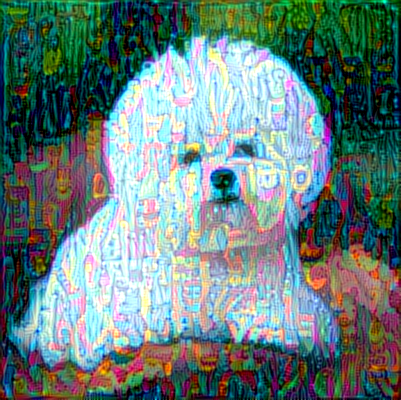

In [11]:
display(Image(result_prefix + "_at_iteration_4000.png"))
